In [2]:
pip install sdv

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [3]:
pip install table_evaluator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 106.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 2.0.3 which is incompatible.


In [4]:
import pandas as pd

from sdmetrics.reports.single_table import QualityReport
from ctgan import CTGAN

from rdt import HyperTransformer

In [5]:
real_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CSV_FILE/adult.csv")

In [6]:
df = pd.DataFrame(real_data)

print(df.columns)

print("Original DataFrame:")
print(df)


Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')
Original DataFrame:
       age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   

In [7]:
NUM_ROWS = 100000
NUM_EPOCHS = 1000
BATCH_SIZE = 1500

In [8]:
df.shape

(32561, 15)

In [9]:
ht = HyperTransformer()
ht.detect_initial_config(data = df)
detected_config = ht.get_config()
display(detected_config)

{
    "sdtypes": {
        "age": "numerical",
        "workclass": "categorical",
        "fnlwgt": "numerical",
        "education": "categorical",
        "education.num": "numerical",
        "marital.status": "categorical",
        "occupation": "categorical",
        "relationship": "categorical",
        "race": "categorical",
        "sex": "categorical",
        "capital.gain": "numerical",
        "capital.loss": "numerical",
        "hours.per.week": "numerical",
        "native.country": "categorical",
        "income": "categorical"
    },
    "transformers": {
        "age": FloatFormatter(),
        "workclass": UniformEncoder(),
        "fnlwgt": FloatFormatter(),
        "education": UniformEncoder(),
        "education.num": FloatFormatter(),
        "marital.status": UniformEncoder(),
        "occupation": UniformEncoder(),
        "relationship": UniformEncoder(),
        "race": UniformEncoder(),
        "sex": UniformEncoder(),
        "capital.gain": FloatFormatt

In [10]:
ht.fit(df)
transformed_df = ht.transform(df)
transformed_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90.0,0.052366,77053.0,0.053123,9.0,0.013082,0.019119,0.143596,0.373419,0.133523,0.0,4356.0,40.0,0.459319,0.272547
1,82.0,0.568465,132870.0,0.300369,9.0,0.017199,0.149767,0.245796,0.486551,0.192714,0.0,4356.0,18.0,0.708768,0.277429
2,66.0,0.022600,186061.0,0.504480,10.0,0.027261,0.014762,0.350066,0.925277,0.066922,0.0,4356.0,40.0,0.683127,0.708181
3,54.0,0.609363,140359.0,0.548441,4.0,0.105613,0.191911,0.287902,0.354498,0.319793,0.0,3900.0,40.0,0.603400,0.633314
4,41.0,0.470378,264663.0,0.415532,10.0,0.188802,0.283315,0.367358,0.644581,0.100573,0.0,3900.0,40.0,0.568972,0.108195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22.0,0.578015,310152.0,0.458453,10.0,0.484006,0.989882,0.043013,0.749511,0.941382,0.0,0.0,40.0,0.467547,0.640913
32557,27.0,0.573395,257302.0,0.896722,12.0,0.787018,0.962568,0.980980,0.382848,0.320521,0.0,0.0,38.0,0.809435,0.750532
32558,40.0,0.659758,154374.0,0.040210,9.0,0.967204,0.196351,0.830186,0.000026,0.494150,0.0,0.0,40.0,0.172248,0.969286
32559,58.0,0.497835,151910.0,0.258776,9.0,0.027938,0.537457,0.284072,0.336407,0.269576,0.0,0.0,40.0,0.761467,0.464751


In [11]:
import time

start_time = time.time()  # Capture start time before training

model = CTGAN(
    epochs=NUM_EPOCHS,
    verbose=True,
    batch_size=BATCH_SIZE,
    embedding_dim = 1024,
    discriminator_steps = 6,
    discriminator_dim = (512,512)
)

model.fit(transformed_df)

# Training is finished, record end time
end_time = time.time()

# Calculate total training time in seconds
training_time = end_time - start_time

print(f"Training completed! Total time taken: {training_time:.2f} seconds")

model.save("/content/drive/MyDrive/Colab Notebooks/CSV_FILE/Models/adult_1000epochs_1500BS_1024_6_512.pkl")

Gen. (0.00) | Discrim. (0.00):   0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at ../aten/src/ATen/cuda/CublasHandlePool.cpp:135.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
Gen. (-1.51) | Discrim. (-0.33): 100%|██████████| 1000/1000 [38:38<00:00,  2.32s/it]


Training completed! Total time taken: 2377.96 seconds


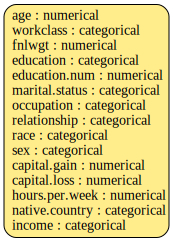

In [12]:
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df)
metadata_dict= metadata.to_dict()
metadata.visualize()

In [13]:
categorical_columns = [column for column, info in metadata_dict['columns'].items() if info['sdtype'] == 'categorical']
print(categorical_columns)

['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']


In [14]:
from sdmetrics.reports.single_table import QualityReport

# Get Synthetic data
synthetic_data = model.sample(NUM_ROWS)
# reverse transform the data
synthetic_data = ht.reverse_transform(synthetic_data)

report = QualityReport()
# Use the metadata OBJECT instead of the dictionary
report.generate(df, synthetic_data, metadata.to_dict())

cs_report = report.get_details(property_name="Column Shapes")
print(cs_report)

# Create the first figure
fig1 = report.get_visualization(property_name='Column Shapes')
fig1.show()

# Create the second figure
fig2 = report.get_visualization(property_name='Column Pair Trends')

fig2.show()

report.save(filepath='/content/drive/MyDrive/Colab Notebooks/CSV_FILE/Models/adult_report_1000epochs_1500BS_1024_6_512.pkl')

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 15/15 [00:00<00:00, 37.17it/s]|
Column Shapes Score: 93.41%

(2/2) Evaluating Column Pair Trends: |██████████| 105/105 [00:07<00:00, 14.25it/s]|
Column Pair Trends Score: 89.63%

Overall Score (Average): 91.52%

            Column        Metric     Score
0              age  KSComplement  0.988581
1        workclass  TVComplement  0.982307
2           fnlwgt  KSComplement  0.974960
3        education  TVComplement  0.973206
4    education.num  KSComplement  0.975200
5   marital.status  TVComplement  0.985605
6       occupation  TVComplement  0.977816
7     relationship  TVComplement  0.980158
8             race  TVComplement  0.988574
9              sex  TVComplement  0.993995
10    capital.gain  KSComplement  0.481810
11    capital.loss  KSComplement  0.770340
12  hours.per.week  KSComplement  0.979356
13  native.country  TVComplement  0.985305
14          income  TVComplement  0.974960


In [15]:
from sdmetrics.single_column import CSTest

for column in categorical_columns:
    cstest_result = CSTest.compute(
        real_data=df[column],
        synthetic_data=synthetic_data[column]
    )
    print(f"CSTest for column {column}: {cstest_result}")

CSTest for column workclass: 0.9997086201516404
CSTest for column education: 1.0
CSTest for column marital.status: 0.9999572209453049
CSTest for column occupation: 1.0
CSTest for column relationship: 0.9999999505238084
CSTest for column race: 0.9999977261147913
CSTest for column sex: 0.9898160112148474
CSTest for column native.country: 1.0
CSTest for column income: 0.9532994881448515


In [16]:
from sdmetrics.visualization import get_column_plot

# Loop through each column in the dataframe
for column in df.columns:
    fig = get_column_plot(
        real_data=df,
        synthetic_data=synthetic_data,
        column_name=column,
    )

    fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [17]:
display(synthetic_data)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25,Private,182573,5th-6th,11,Never-married,Adm-clerical,Own-child,White,Female,-32,1,24,United-States,<=50K
1,68,Private,402324,Preschool,3,Married-civ-spouse,Exec-managerial,Husband,White,Male,-1,1,40,United-States,>50K
2,39,Private,121603,Some-college,10,Married-civ-spouse,Adm-clerical,Unmarried,White,Female,-7,0,40,Mexico,>50K
3,61,Federal-gov,118559,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,-19,-1,40,?,<=50K
4,43,Private,277336,Preschool,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,20,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,34,Self-emp-not-inc,221206,HS-grad,9,Married-civ-spouse,?,Own-child,White,Male,2659,-1,15,United-States,<=50K
99996,31,Private,100825,9th,11,Separated,Exec-managerial,Not-in-family,White,Male,-19,0,40,United-States,<=50K
99997,33,Private,176971,HS-grad,9,Separated,Sales,Not-in-family,White,Female,31,0,40,United-States,<=50K
99998,38,Private,370078,Some-college,10,Married-civ-spouse,Exec-managerial,Wife,White,Male,-14,0,40,El-Salvador,<=50K


In [18]:
from itertools import combinations
from sdmetrics.visualization import get_column_pair_plot

# Get all column pairs
column_pairs = combinations(df.columns, 2)

# Loop through each column pair
for column1, column2 in column_pairs:
  # Generate the plot using get_column_pair_plot
  fig = get_column_pair_plot(
      real_data=df,
      synthetic_data=synthetic_data,
      column_names=[column1, column2]
  )


  fig.show()


Output hidden; open in https://colab.research.google.com to view.

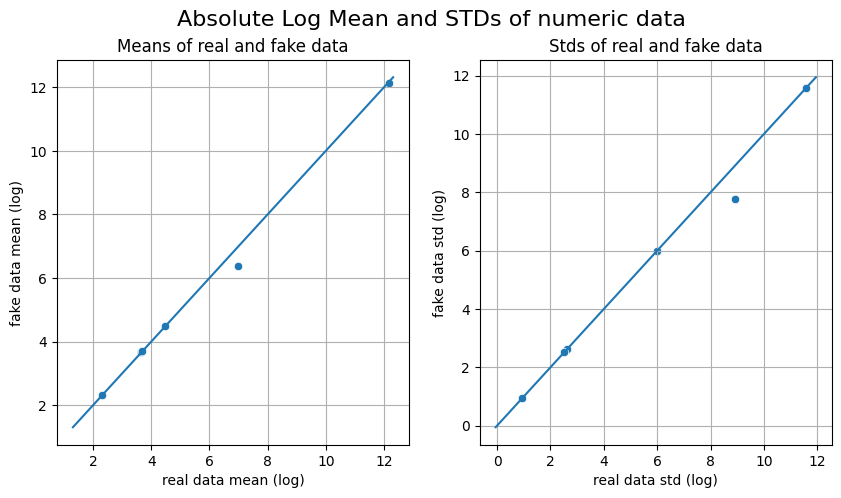

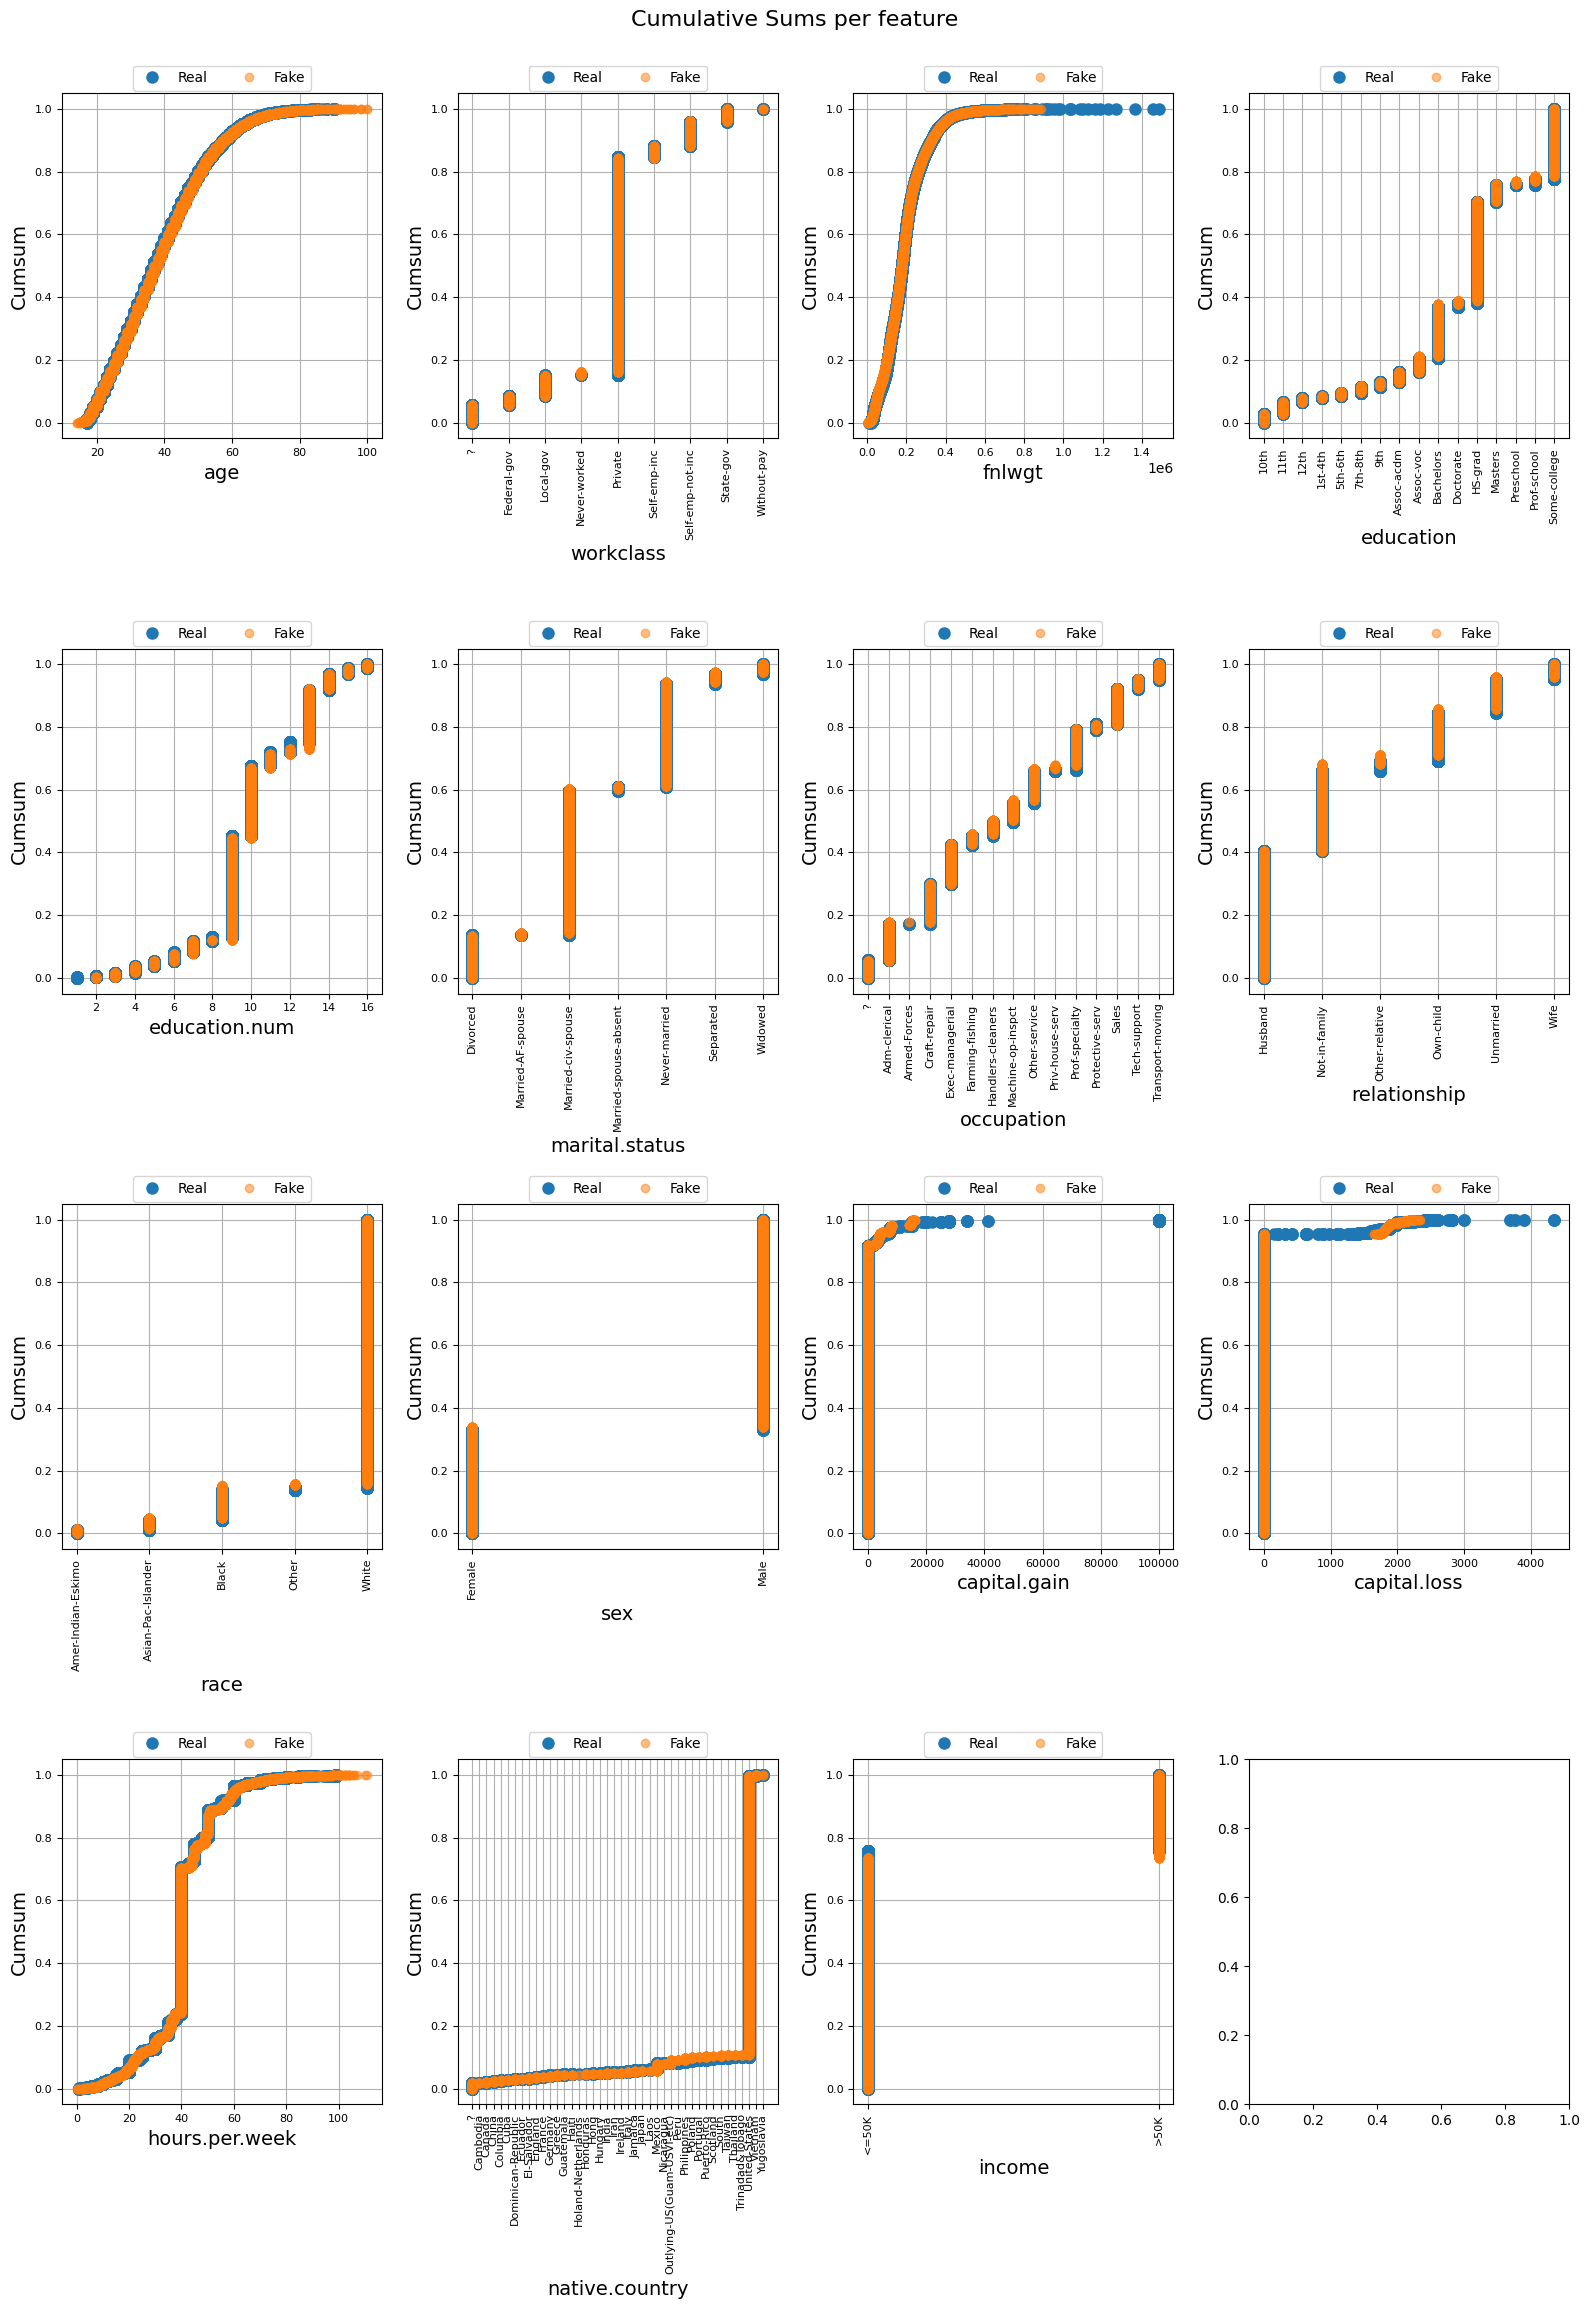

/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/table_evaluator/ta

KeyboardInterrupt: 

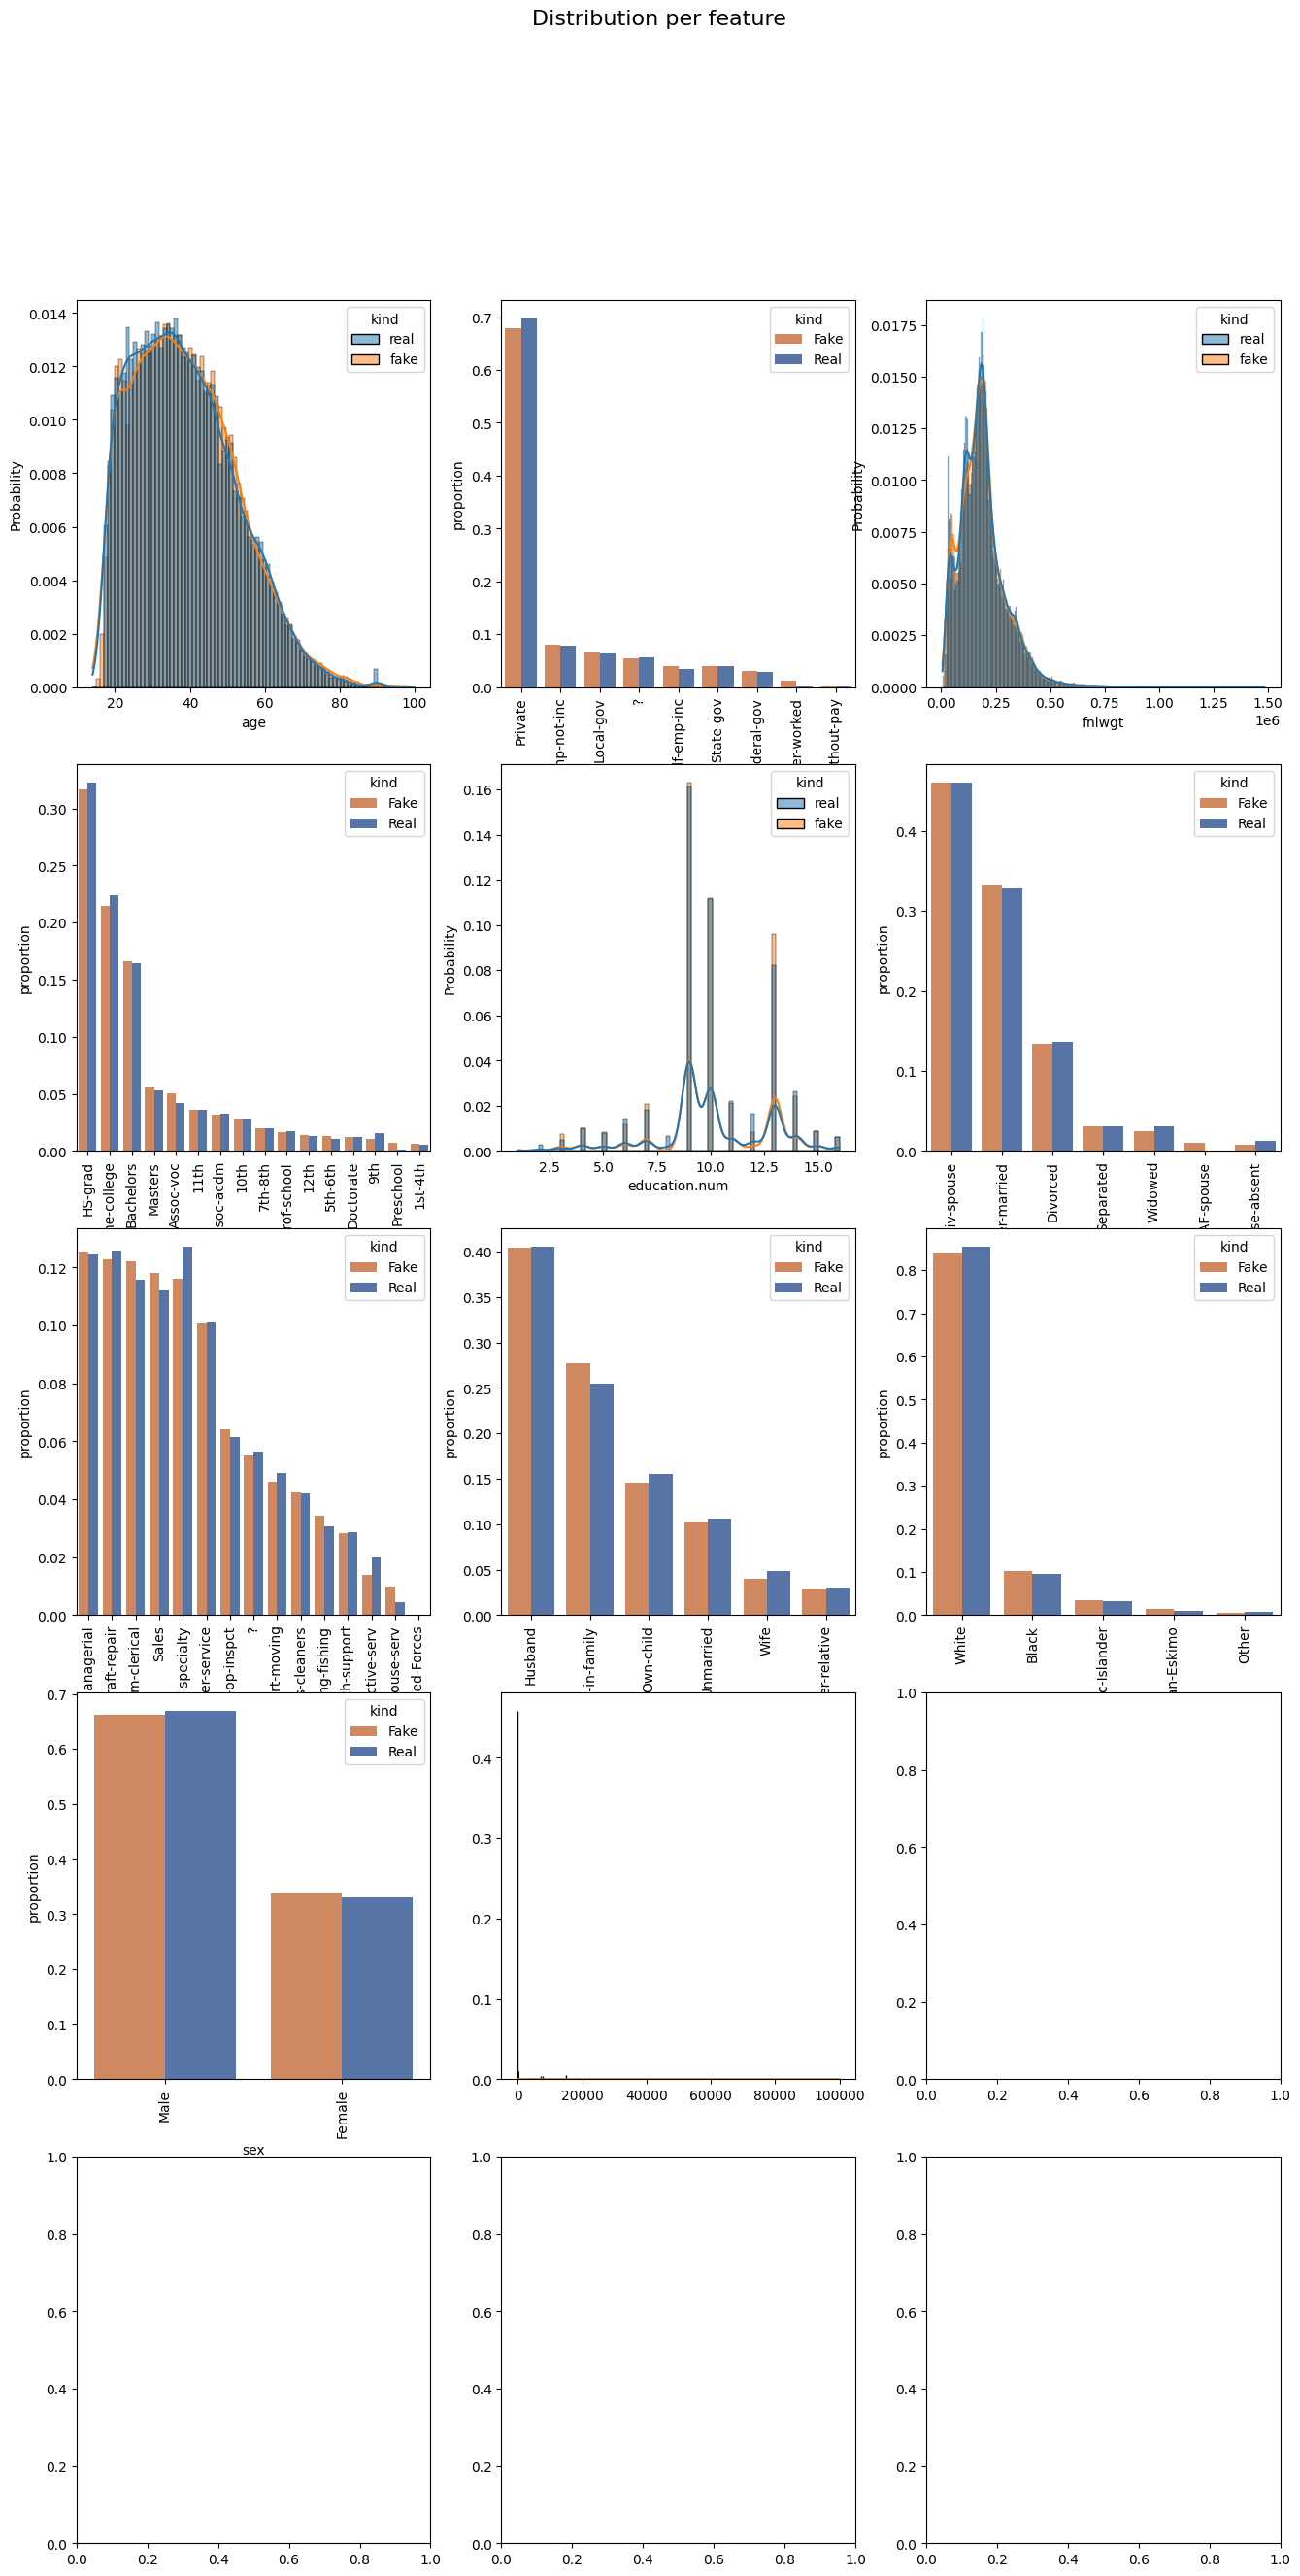

In [20]:
from table_evaluator import TableEvaluator

# Assuming real_data and synthetic_data are pandas DataFrames
table_evaluator = TableEvaluator(df, synthetic_data)

table_evaluator.visual_evaluation()

In [ ]:
syn_df = pd.DataFrame(synthetic_data)

LINEAR REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
df_without_species = transformed_df.drop(columns=['Species'])
df_without_species.dropna()

In [ ]:
X_train_old,X_test_old,Y_train_old,Y_test_old = train_test_split(df_without_species,transformed_df['Species'],test_size=0.2,random_state=0)

In [ ]:
new_df = ht.transform(syn_df)
new_df_without_species = new_df.drop(columns=['Species'])

In [ ]:
X_train_new,X_test_new,Y_train_new,Y_test_new = train_test_split(new_df_without_species,new_df['Species'],test_size=0.2,random_state=0)

In [ ]:
model_old = LinearRegression()
model_old.fit(X_train_old,Y_train_old)

In [ ]:
# Trained on original data and tested on original data
score_old_old = model_old.score(X_test_old,Y_test_old)
print(f"The coefficient of determination is: {score_old_old:.6f}")

In [ ]:
#Trained on original data and Testing on new Data
score_old_new = model_old.score(X_test_new,Y_test_new)
print(f"The coefficient of determination is: {score_old_new:.6f}")

In [ ]:
#Training on new data
model_new = LinearRegression()
model_new.fit(X_train_new,Y_train_new)

In [ ]:
#trained on new data and tested on Old data
score_new_old = model_new.score(X_test_old,Y_test_old)
print(f"The coefficient of determination is: {score_new_old:.6f}")

LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import joblib
# Split the data into train and test sets

label_encoder = LabelEncoder()
df_copy = df.copy()
df_copy['Diagnosis_encoded'] = label_encoder.fit_transform(df_copy['Species'])

X_train_old, X_test_old, y_train_old, y_test_old = train_test_split(df_without_species, df_copy['Diagnosis_encoded'], test_size=0.2, random_state=42)

In [ ]:
syn_df['Diagnosis_encoded'] = label_encoder.fit_transform(syn_df['Species'])

X_train_new,X_test_new,Y_train_new,Y_test_new = train_test_split(new_df_without_species,syn_df['Diagnosis_encoded'],test_size=0.2,random_state=0)

In [ ]:
log_reg_old = LogisticRegression()
log_reg_old.fit(X_train_old, y_train_old)

#Trained on original data and tested on original data
score_old_old = log_reg_old.score(X_test_old, y_test_old)
print(f"The coefficient of determination is: {score_old_old:.6f}")

In [ ]:
#Trained on original data and tested on new data
score_old_new = log_reg_old.score(X_test_new, Y_test_new)
print(f"The coefficient of determination is: {score_old_new:.6f}")

In [ ]:
log_reg_new = LogisticRegression()
log_reg_new.fit(X_train_new, Y_train_new)

#Trained on new data and tested on original data
score_new_old = log_reg_new.score(X_test_old, y_test_old)
print(f"The coefficient of determination is: {score_new_old:.6f}")